In [1]:
!pip install fastf1

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as p

In [4]:
year, grand_prix, session = 2023, 'Monaco', 'R'

quali = ff1.get_session(year, grand_prix, session)
quali.load() # This is new with Fastf1 v.2.2

# This is how it used to be:
# laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.2.9]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [5]:
driver_1, driver_2 = 'VER', 'PIA'

In [6]:
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

In [7]:
# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

In [8]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

In [9]:
plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

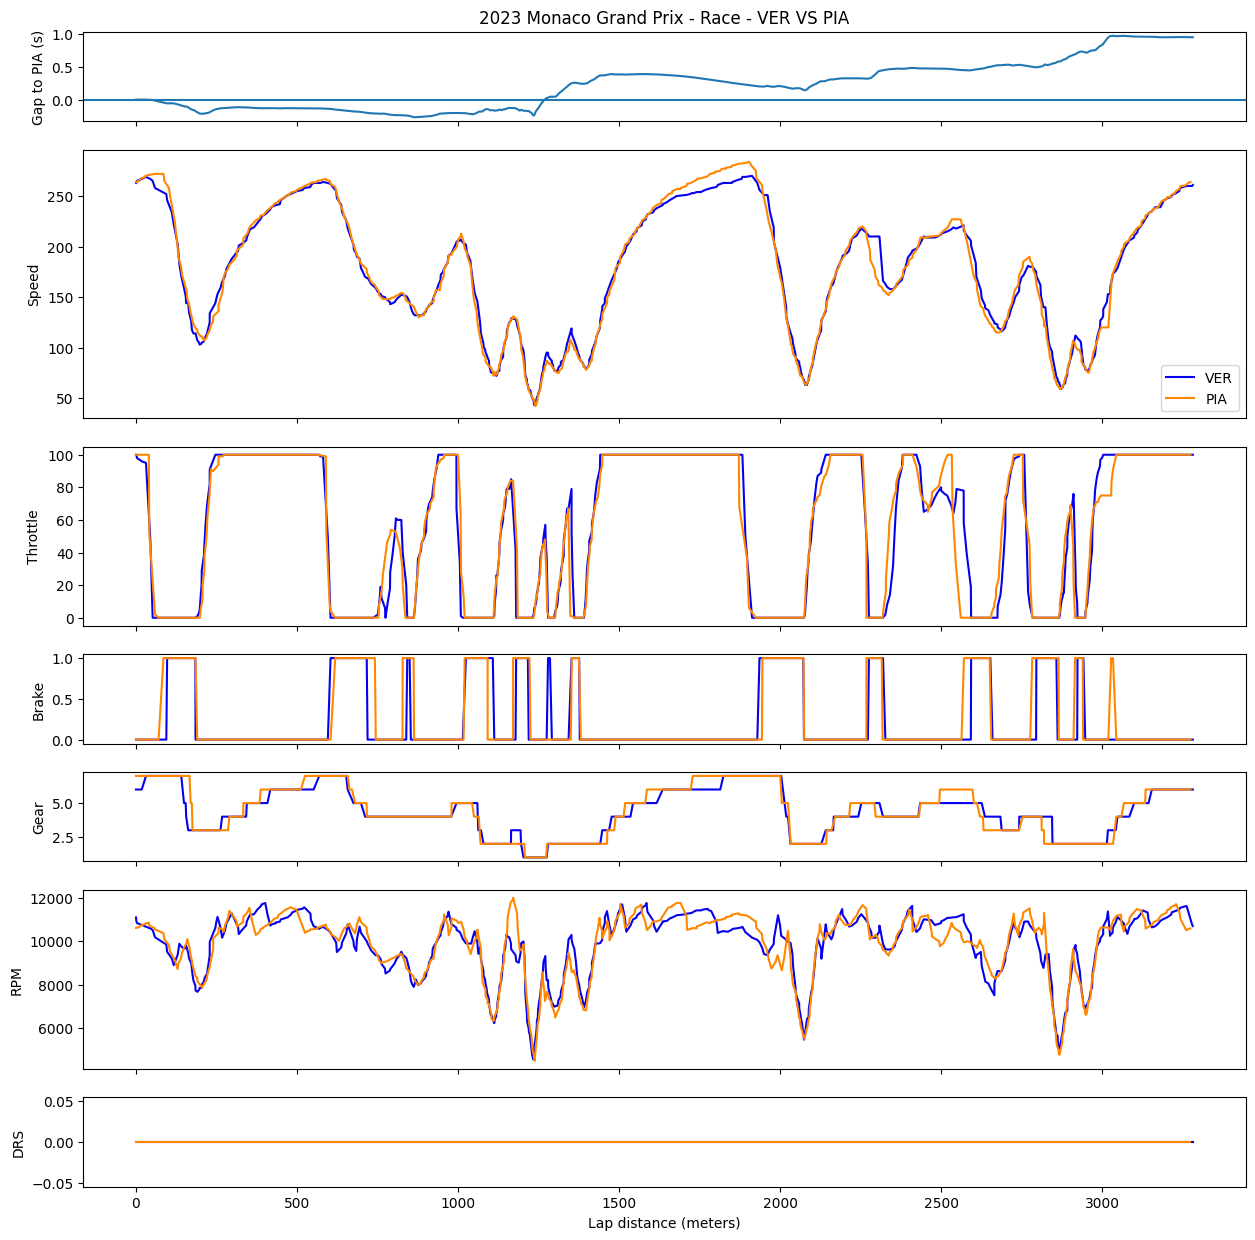

In [10]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()

In [11]:
session = ff1.get_session(2023, "Monaco", 'R')
session.load()
laps = session.laps

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.2.9]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [12]:
drivers = session.drivers
print(drivers)

['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [13]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'ALO', 'OCO', 'HAM', 'RUS', 'LEC', 'GAS', 'SAI', 'NOR', 'PIA', 'BOT', 'DEV', 'ZHO', 'ALB', 'TSU', 'PER', 'HUL', 'SAR', 'MAG', 'STR']


In [14]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [15]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint      Compound  StintLength
0     ALB      1        MEDIUM           18
1     ALB      2          HARD           34
2     ALB      3  INTERMEDIATE           25
3     ALO      1          HARD           54
4     ALO      2        MEDIUM            1
5     ALO      3  INTERMEDIATE           23
6     BOT      1          HARD           51
7     BOT      2  INTERMEDIATE           26
8     DEV      1        MEDIUM           53
9     DEV      2  INTERMEDIATE           24
10    GAS      1          HARD           47
11    GAS      2        MEDIUM            7
12    GAS      3  INTERMEDIATE           24
13    HAM      1        MEDIUM           31
14    HAM      2          HARD           23
15    HAM      3  INTERMEDIATE           24
16    HUL      1        MEDIUM            1
17    HUL      2          HARD           53
18    HUL      3  INTERMEDIATE            5
19    HUL      4           WET           17
20    LEC      1          HARD           44
21    LEC      2        MEDIUM  

AttributeError: module 'fastf1.plotting' has no attribute 'COMPOUND_COLORS'

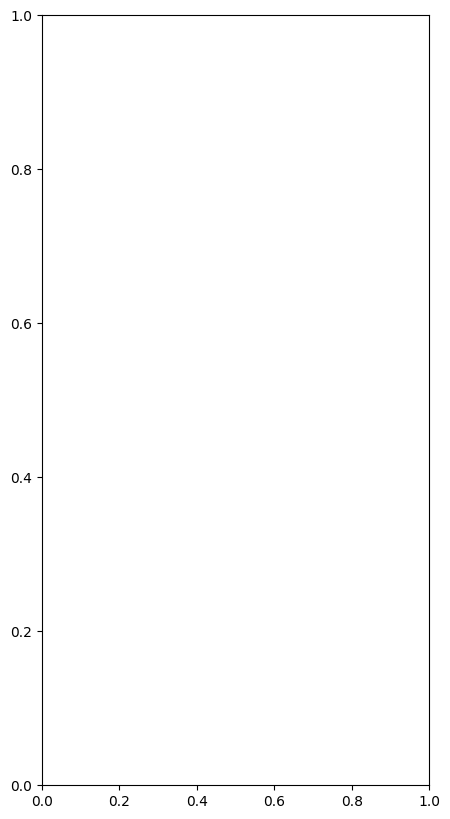

In [16]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=ff1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
plt.title("2023 Monaco Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()